In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder


In [104]:

# Veri setinin dizin yolunu belirt
dataset_path = "/Users/anilturkmen/Desktop/Bitirme_tezi/Garbage_classification2"

# Veri setindeki tüm dosyaları listele
files = os.listdir(dataset_path)

# Tüm dosya isimlerini yazdır
print("Tüm Dosyalar:")
for file in files:
    print(file)

Tüm Dosyalar:
paper
.DS_Store
metal
cardboard
trash
glass
plastic


In [106]:

def analyze_dataset(dataset_path):
    # Veri setindeki tüm dosyaları listele
    folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    
    # Boş bir liste oluştur, bu liste içerisine görsel türlerini ekleyeceğiz
    image_types = []
    
    # Boş bir sözlük oluştur, bu sözlüğe görsellerin boyutlarını kaydedeceğiz
    image_dimensions = {}
    
    # Her klasörü kontrol et
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        # Klasördeki tüm dosyaları listele
        files = os.listdir(folder_path)
        # Klasördeki her dosyayı kontrol et
        for file in files:
            # Dosyanın tam yolu
            file_path = os.path.join(folder_path, file)
            
            # Dosyanın uzantısını al ve küçük harfe çevir
            file_ext = os.path.splitext(file)[1].lower()
            
            # Eğer dosya bir dosya değilse veya görsel değilse atla
            if not os.path.isfile(file_path) or not any(file_ext.endswith(ext) for ext in ['.jpg', '.jpeg', '.png', '.bmp', '.gif']):
                continue
            
            # Görselin türünü belirle
            if file_ext not in image_types:
                image_types.append(file_ext)
            
            # Görselin boyutlarını al
            with Image.open(file_path) as img:
                width, height = img.size
                image_dimensions[file] = (width, height)
    
    # Elde edilen sonuçları yazdır
    print("Veri Setindeki Görsel Türleri:")
    print(image_types)
    print("\nGörsellerin Boyutları:")
    for filename, dimensions in image_dimensions.items():
        print(f"{filename}: {dimensions[0]}x{dimensions[1]}")

# Veri setinin dizin yolunu belirt
dataset_path = "/Users/anilturkmen/Desktop/Bitirme_tezi/Garbage_classification2"
analyze_dataset(dataset_path)


Veri Setindeki Görsel Türleri:
['.jpg']

Görsellerin Boyutları:
paper903.jpg: 512x384
paper917.jpg: 512x384
paper724.jpg: 512x384
paper730.jpg: 197x256
paper718.jpg: 183x275
paper283.jpg: 512x384
paper297.jpg: 512x384
paper526.jpg: 512x384
paper240.jpg: 512x384
paper254.jpg: 512x384
paper532.jpg: 512x384
paper268.jpg: 512x384
paper491.jpg: 512x384
paper64.jpg: 512x384
paper70.jpg: 512x384
paper485.jpg: 512x384
paper58.jpg: 512x384
paper452.jpg: 512x384
paper334.jpg: 512x384
paper320.jpg: 512x384
paper446.jpg: 512x384
paper308.jpg: 512x384
paper693.jpg: 512x384
paper687.jpg: 512x384
paper877.jpg: 512x384
paper863.jpg: 191x264
paper136.jpg: 512x384
paper650.jpg: 512x384
paper888.jpg: 512x384
paper644.jpg: 512x384
paper122.jpg: 512x384
paper678.jpg: 512x384
paper679.jpg: 512x384
paper645.jpg: 512x384
paper123.jpg: 512x384
paper137.jpg: 512x384
paper593 23.05.50.jpg: 512x384
paper889.jpg: 512x384
paper651.jpg: 512x384
paper862.jpg: 512x384
paper876.jpg: 512x384
paper686.jpg: 512x384
paper6

In [108]:

def count_images_per_class(dataset_path):
    # Veri setindeki tüm klasörleri listele
    folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    
    # Her bir sınıf için görsel sayısını tutacak bir sözlük oluştur
    class_image_counts = {}
    
    # Her klasörü kontrol et
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        # Klasördeki tüm dosyaları listele
        files = os.listdir(folder_path)
        # Klasördeki her dosyayı kontrol et
        image_count = 0
        for file in files:
            # Dosyanın tam yolu
            file_path = os.path.join(folder_path, file)
            # Eğer dosya bir dosya değilse veya görsel değilse atla
            if not os.path.isfile(file_path):
                continue
            # Dosya görsel dosyasıysa sayacı artır
            image_count += 1
        # Sınıfın adını ve görsel sayısını sözlüğe ekle
        class_image_counts[folder] = image_count
    
    # Elde edilen sonuçları yazdır
    print("Sınıf Adı: Görsel Sayısı")
    for class_name, count in class_image_counts.items():
        print(f"{class_name}: {count}")

# Veri setinin dizin yolunu belirt
dataset_path = "/Users/anilturkmen/Desktop/Bitirme_tezi/Garbage_classification2"
count_images_per_class(dataset_path)


Sınıf Adı: Görsel Sayısı
paper: 1051
metal: 801
cardboard: 892
trash: 745
glass: 1004
plastic: 1347


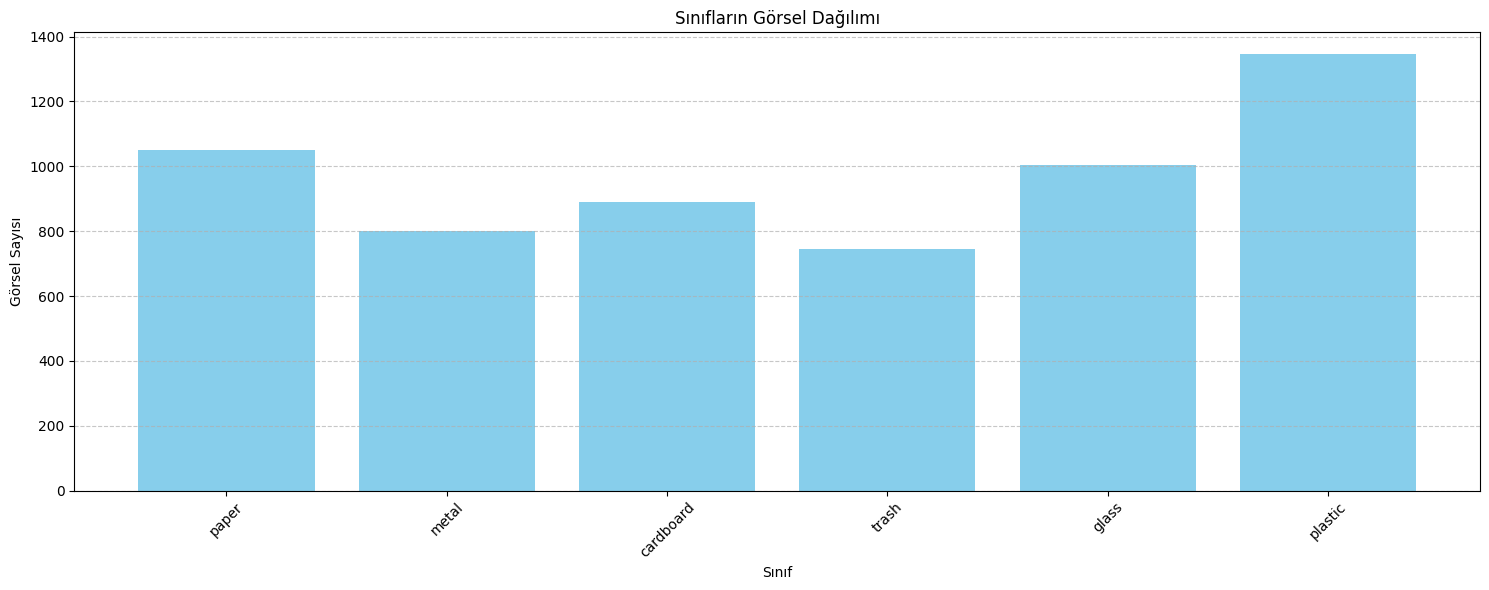

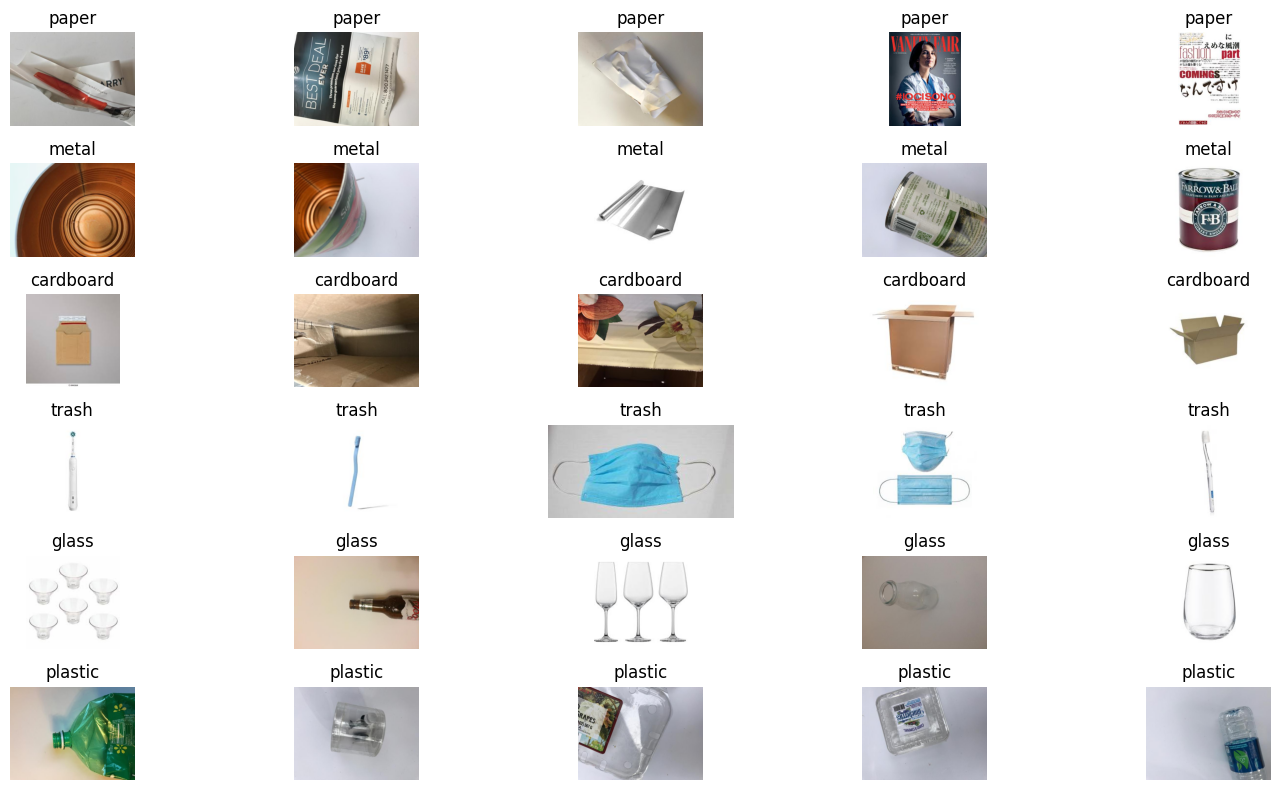

In [109]:


def visualize_dataset_distribution(dataset_path):
    # Veri setindeki tüm klasörleri listele
    folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    
    # Her bir sınıf için görsel sayısını tutacak bir sözlük oluştur
    class_image_counts = {}
    # Her bir sınıf için örnek görselleri tutacak bir sözlük oluştur
    sample_images = {}
    
    # Her klasörü kontrol et
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        # Klasördeki tüm dosyaları listele
        files = os.listdir(folder_path)
        # Klasördeki her dosyayı kontrol et
        images = []
        for file in files:
            # Dosyanın tam yolu
            file_path = os.path.join(folder_path, file)
            # Eğer dosya bir dosya değilse veya görsel değilse atla
            if not os.path.isfile(file_path) or not any(file.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png', '.bmp', '.gif']):
                continue
            # Görseli yükle
            image = cv2.imread(file_path)
            # Görseli RGB formatına dönüştür
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Görseli listeye ekle
            images.append(image_rgb)
        # Sınıf adını ve görsel sayısını sözlüğe ekle
        class_image_counts[folder] = len(images)
        # Sınıf adını ve örnek görselleri sözlüğe ekle
        sample_images[folder] = images
    
    # Sınıfların görsel sayılarını görselleştir
    plt.figure(figsize=(15, 6))
    plt.bar(class_image_counts.keys(), class_image_counts.values(), color='skyblue')
    plt.xlabel('Sınıf')
    plt.ylabel('Görsel Sayısı')
    plt.title('Sınıfların Görsel Dağılımı')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Sınıfların örnek görsellerini görselleştir
    plt.figure(figsize=(15, 8))
    for i, (class_name, images) in enumerate(sample_images.items()):
        for j, image in enumerate(images[:5]):  # Her sınıftan sadece 5 örnek göster
            plt.subplot(len(sample_images), 5, i * 5 + j + 1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Veri setinin dizin yolunu belirt
dataset_path = "/Users/anilturkmen/Desktop/Bitirme_tezi/Garbage_classification2"
visualize_dataset_distribution(dataset_path)


In [110]:

def extract_features(dataset_path, batch_size=32):
    # Veri seti dönüşümleri
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # ResNet için giriş boyutu
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet için normalizasyon
    ])

    # Veri setini yükleyin
    dataset = ImageFolder(dataset_path, transform=transform)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # ResNet modelini yükle
    model = models.resnet18(pretrained=True)
    # ResNet modelinin son katmanını (softmax katmanı) kaldır
    model = torch.nn.Sequential(*list(model.children())[:-1])
    # Modeli eğitim modundan çıkar
    model.eval()

    # Özelliklerin ve etiketlerin depolanacağı listeleri oluştur
    features = []
    labels = []

    # Veri kümesindeki her bir mini-batch için özellikleri çıkar
    for images, batch_labels in data_loader:
        # Özellikleri çıkar
        with torch.no_grad():
            output = model(images)
        # Özellikleri listeye ekle
        features.append(output.squeeze().numpy())
        # Etiketleri listeye ekle
        labels.append(batch_labels.numpy())

    # Listeleri birleştir
    features = np.concatenate(features)
    labels = np.concatenate(labels)

    return features, labels

# Veri setinin dizin yolunu belirt
dataset_path = "/Users/anilturkmen/Desktop/Bitirme_tezi/Garbage_classification2"

# Özellikleri ve etiketleri çıkar
features, labels = extract_features(dataset_path)

# Elde edilen özelliklerin ve etiketlerin boyutlarını kontrol et
print("Özelliklerin boyutu:", features.shape)
print("Etiketlerin boyutu:", labels.shape)


/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Özelliklerin boyutu: (5890, 512)
Etiketlerin boyutu: (5890,)


In [111]:
import tensorflow
import matplotlib.pyplot as plt
# VGG16 stands out as a pre-trained cornerstone in convolutional neural network technology.
ozellik_cikaran_model = tensorflow.keras.applications.VGG16(weights='imagenet',
                                                include_top=False,
                                                input_shape=(224, 224, 3)
                                                )

# Displaying the intricate layers of convolutions
ozellik_cikaran_model.summary()

# An empty blueprint for the model is established.
model = tensorflow.keras.models.Sequential()

# Integrating VGG16 as a foundational convolutional layer.
model.add(ozellik_cikaran_model)

# Transforming layers from matrices into a vector format.
model.add(tensorflow.keras.layers.Flatten())

# Our neural network layer is incorporated.
model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
model.add(tensorflow.keras.layers.Dense(6, activation='softmax'))

# Determining the layers to be trained and set as unalterable. Freezing layers until 'block5_conv1'
ozellik_cikaran_model.trainable = True
set_trainable = False
for layer in ozellik_cikaran_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

# Displaying the finalized model architecture.
model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [112]:
# Specifying the directories containing the data.
EGITIM = '/Users/anilturkmen/Desktop/Bitirme_tezi/Garbage_classification/EGITIM'
GECERLEME_YOLU = '/Users/anilturkmen/Desktop/Bitirme_tezi/Garbage_classification/GECERLEME'
TEST = '/Users/anilturkmen/Desktop/Bitirme_tezi/Garbage_classification/TEST'

# To mitigate overfitting, data augmentation techniques are applied.
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,  # piksel değerleri 0-255'den 0-1 arasına getiriliyor.
    rotation_range=40,  # istenilen artırma işlemleri yapılabilir.
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    EGITIM,
    target_size=(224, 224),
    batch_size=16,
)

# For validating the training process, augmented images are not utilized.
validation_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255
)

validation_generator = validation_datagen.flow_from_directory(
    GECERLEME_YOLU,
    target_size=(224, 224),
    batch_size=16,
)

Found 4500 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [113]:
# Training process commences for the model.

EGITIM_TAKIP = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=1)


Epoch 1/2


/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - acc: 0.1507 - loss: 0.6572 - val_acc: 0.4375 - val_loss: 0.4092
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - acc: 0.2573 - loss: 0.4464 - val_acc: 0.3125 - val_loss: 0.4275


In [114]:
model.save('model_örnek.keras')

In [115]:
# For testing the trained model, augmented images are unnecessary.
test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255
)

test_generator = test_datagen.flow_from_directory(
    TEST,
    target_size=(224, 224),
    batch_size=20,
)

# Printing out the test results.
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

Found 1969 images belonging to 6 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - acc: 0.2165 - loss: 0.4537
test acc: 0.21199999749660492


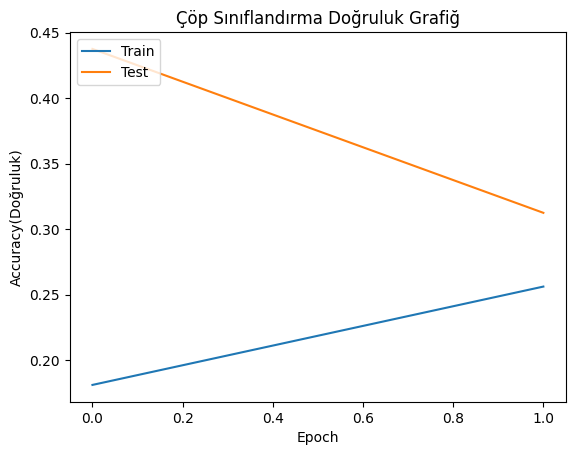

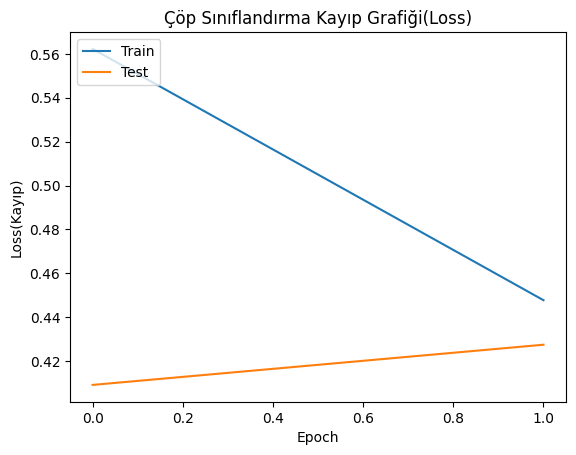

In [117]:
# Plot training & validation accuracy values
plt.plot(EGITIM_TAKIP.history['acc'])
plt.plot(EGITIM_TAKIP.history['val_acc'])
plt.title('Çöp Sınıflandırma Doğruluk Grafiğ')
plt.ylabel('Accuracy(Doğruluk)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(EGITIM_TAKIP.history['loss'])
plt.plot(EGITIM_TAKIP.history['val_loss'])
plt.title('Çöp Sınıflandırma Kayıp Grafiği(Loss)')
plt.ylabel('Loss(Kayıp)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()